In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [2]:
data = pd.DataFrame({'X1': [1,2,3,4,5], 
                     'X2': [2,3,4,5,6],
                     'X3': [2,6,3,7,1],
                     'X4': [3,1,3,5,2],
                     'Y' : [0,2,2,3,4]   })

In [3]:
data.head()

,X1,X2,X3,X4,Y
0,1,2,2,3,0
1,2,3,6,1,2
2,3,4,3,3,2
3,4,5,7,5,3
4,5,6,1,2,4


<hr><h3>Method 1 to Detect MultiCollinearity</h3><hr>

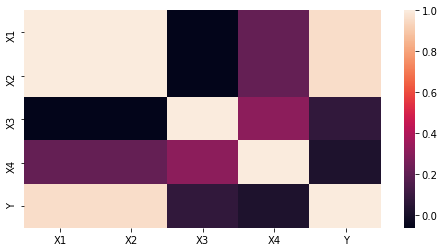

In [4]:
plt.rcParams["figure.figsize"] = (8,4)
sns.heatmap(data.corr())
plt.show()

<h6>Here we can see that X1 and X2 have a high and similar correlation coefficient</h6><br>
<i><p>(Also X3 and X4 have similar coefficients but they are lower so we can allow low collinearity)</p></i>

<hr><h3>Method 2 to Detect MultiCollinearity</h3><hr>

In [5]:
def get_VIF(dataFrame , target):
    X = add_constant(dataFrame.loc[:, dataFrame.columns != target])
    seriesObject = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])] , index=X.columns,)
    return seriesObject

In [6]:
target = 'Y'
print(get_VIF(data,target))

const    0.000000
X1            inf
X2            inf
X3       1.129667
X4       1.179045
dtype: float64


<h6>Here we Observe that X1 and X2 are having VIF value of infinity so we need to drop one of them</h6><br>
<i><p>(Any value greater than 5-6 shows MultiCollinearity)</p></i>

<h6>Therefore we can drop X1 or X2</h6>